In [1]:
# import libraries
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

### Read Data

In [2]:
lgbm_pred = pd.read_pickle('../results/lgbm_predictions.pkl')
lr_pred = pd.read_pickle('../results/lr_predictions.pkl')
xinyue_pred_3 = pd.read_pickle('../results/xinyue_predictions_3.pkl')
xinyue_pred_6 = pd.read_pickle('../results/xinyue_predictions_6.pkl')
xinyue_pred_9 = pd.read_pickle('../results/xinyue_predictions_9.pkl')

### Prepare Data

In [3]:
lgbm_pred = lgbm_pred.rename(columns={'direction_pred':'lgbm_direction_pred',
                                      'value_pred':'lgbm_value_pred'})
lr_pred = lr_pred.rename(columns={'direction_pred':'lr_direction_pred',
                                  'value_pred':'lr_value_pred'})
xinyue_pred_3 = xinyue_pred_3.rename(columns={'direction_pred':'xinyue_3_direction_pred',
                                              'value_pred':'xinyue_3_value_pred'})
xinyue_pred_6 = xinyue_pred_6.rename(columns={'direction_pred':'xinyue_6_direction_pred',
                                              'value_pred':'xinyue_6_value_pred'})
xinyue_pred_9 = xinyue_pred_9.rename(columns={'direction_pred':'xinyue_9_direction_pred',
                                              'value_pred':'xinyue_9_value_pred'})

### Calculate Metrics

In [4]:
print('Test Data:')
print('Num of obs', len(lgbm_pred), 'Num of increases', sum(lgbm_pred['direction_actual']), 'Num of decreases', len(lgbm_pred) - sum(lgbm_pred['direction_actual']),end = '\n\n')

Test Data:
Num of obs 31866 Num of increases 16712.0 Num of decreases 15154.0



In [6]:
# 2-class results (Normal)

print('2-class',end='\n\n')

print('LGBM Model:')
print('accuracy', accuracy_score(lgbm_pred['direction_actual'], lgbm_pred['lgbm_direction_pred']),
      'f1', f1_score(lgbm_pred['direction_actual'], lgbm_pred['lgbm_direction_pred'], average='macro'),
      'auc', roc_auc_score(lgbm_pred['direction_actual'], lgbm_pred['lgbm_value_pred']))
print('Num of obs', len(lgbm_pred), 'Num of increases', sum(lgbm_pred['lgbm_direction_pred']), 'Num of decreases', len(lgbm_pred) - sum(lgbm_pred['lgbm_direction_pred']),end = '\n\n')

print('Analyst (Mean):')
print('accuracy', accuracy_score(lgbm_pred['direction_actual'], lgbm_pred['direction_analyst_mean']),
      'f1', f1_score(lgbm_pred['direction_actual'], lgbm_pred['direction_analyst_mean'], average='macro'),
      'auc', roc_auc_score(lgbm_pred['direction_actual'], lgbm_pred['value_analyst_mean']),end = '\n\n')
print('Num of obs', len(lgbm_pred), 'Num of increases', sum(lgbm_pred['direction_analyst_mean']), 'Num of decreases', len(lgbm_pred) - sum(lgbm_pred['direction_analyst_mean']),end = '\n\n')

print('Analyst (Median):')
print('accuracy', accuracy_score(lgbm_pred['direction_actual'], lgbm_pred['direction_analyst_median']),
      'f1', f1_score(lgbm_pred['direction_actual'], lgbm_pred['direction_analyst_median'], average='macro'),
      'auc', roc_auc_score(lgbm_pred['direction_actual'], lgbm_pred['value_analyst_median']))
print('Num of obs', len(lgbm_pred), 'Num of increases', sum(lgbm_pred['direction_analyst_median']), 'Num of decreases', len(lgbm_pred) - sum(lgbm_pred['direction_analyst_median']),end = '\n\n')

print('LR Model:')
print('accuracy', accuracy_score(lr_pred['direction_actual'], lr_pred['lr_direction_pred']),
      'f1', f1_score(lr_pred['direction_actual'], lr_pred['lr_direction_pred'], average='macro'),
      'auc', roc_auc_score(lr_pred['direction_actual'], lr_pred['lr_value_pred']),end = '\n\n')
print('Num of obs', len(lr_pred), 'Num of increases', sum(lr_pred['lr_direction_pred']), 'Num of decreases', len(lr_pred) - sum(lr_pred['lr_direction_pred']),end = '\n\n')

2-class

LGBM Model:
accuracy 0.7453084792568883 f1 0.7448559617841501 auc 0.8213346526009371
Num of obs 31866 Num of increases 16496 Num of decreases 15370

Analyst (Mean):
accuracy 0.804242766585075 f1 0.8042269966550588 auc 0.8618562347421743

Num of obs 31866 Num of increases 15440.0 Num of decreases 16426.0

Analyst (Median):
accuracy 0.804274147994728 f1 0.8042682448655873 auc 0.8615736583585165
Num of obs 31866 Num of increases 15329.0 Num of decreases 16537.0

LR Model:
accuracy 0.6952865122701312 f1 0.6951112562260664 auc 0.7601742186947689

Num of obs 31866 Num of increases 15918.0 Num of decreases 15948.0



In [7]:
# Xinyue 3-class results
print('3-class',end='\n\n')
print('LGBM Model:')
print('accuracy', accuracy_score(xinyue_pred_3['direction_actual'], xinyue_pred_3['xinyue_3_direction_pred']),end = '\n\n')
print('Analyst (Mean):')
print('accuracy', accuracy_score(xinyue_pred_3['direction_actual'], xinyue_pred_3['direction_analyst_mean']),end = '\n\n')
print('Analyst (Median):')
print('accuracy', accuracy_score(xinyue_pred_3['direction_actual'], xinyue_pred_3['direction_analyst_median']))

3-class

LGBM Model:
accuracy 0.6315508692650473

Analyst (Mean):
accuracy 0.7254440469465888

Analyst (Median):
accuracy 0.727766271260905


In [8]:
# Xinyue 6-class model results
print('6-class',end='\n\n')
print('LGBM Model:')
print('accuracy', accuracy_score(xinyue_pred_6['direction_actual'], xinyue_pred_6['xinyue_6_direction_pred']),end = '\n\n')
print('Analyst (Mean):')
print('accuracy', accuracy_score(xinyue_pred_6['direction_actual'], xinyue_pred_6['direction_analyst_mean']),end = '\n\n')
print('Analyst (Median):')
print('accuracy', accuracy_score(xinyue_pred_6['direction_actual'], xinyue_pred_6['direction_analyst_median']))

6-class

LGBM Model:
accuracy 0.43215339233038347

Analyst (Mean):
accuracy 0.5689135755978159

Analyst (Median):
accuracy 0.5714868511893554


In [9]:
# Xinyue 9-class model results
print('9-class',end='\n\n')
print('LGBM Model:')
print('accuracy', accuracy_score(xinyue_pred_9['direction_actual'], xinyue_pred_9['xinyue_9_direction_pred']),end = '\n\n')
print('Analyst (Mean):')
print('accuracy', accuracy_score(xinyue_pred_9['direction_actual'], xinyue_pred_9['direction_analyst_mean']),end = '\n\n')
print('Analyst (Median):')
print('accuracy', accuracy_score(xinyue_pred_9['direction_actual'], xinyue_pred_9['direction_analyst_median']))

9-class

LGBM Model:
accuracy 0.329065461620536

Analyst (Mean):
accuracy 0.4661394589844976

Analyst (Median):
accuracy 0.4699052281428482


### ROC Curves of LightGBM and Analysts’ Forecasts

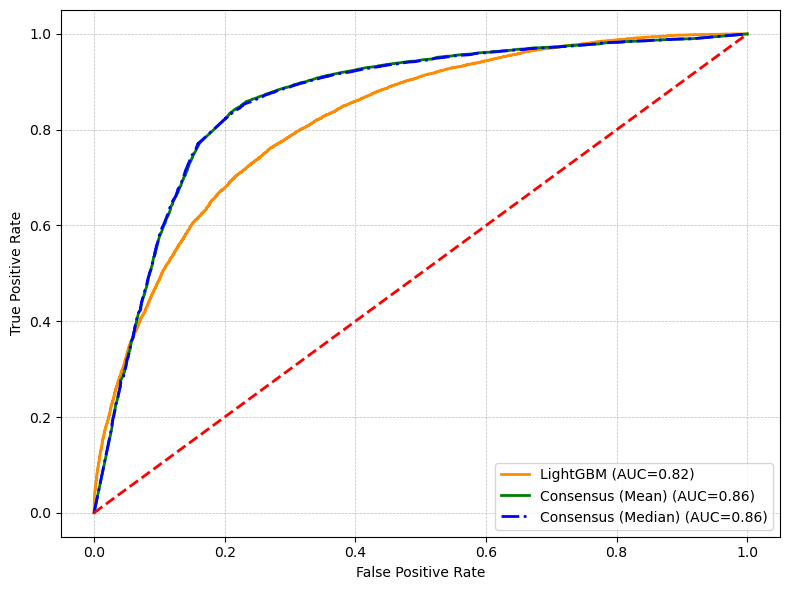

In [10]:
fpr_lgbm, tpr_lgbm, thr_lgbm = roc_curve(lgbm_pred['direction_actual'], lgbm_pred['lgbm_value_pred'])
auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

fpr_analyst_mean, tpr_analyst_mean, thr_analyst_mean = roc_curve(lgbm_pred['direction_actual'], lgbm_pred['value_analyst_mean'])
auc_analyst_mean = auc(fpr_analyst_mean, tpr_analyst_mean)

fpr_analyst_median, tpr_analyst_median, thr_analyst_median = roc_curve(lgbm_pred['direction_actual'], lgbm_pred['value_analyst_median'])
auc_analyst_median = auc(fpr_analyst_median, tpr_analyst_median)

plt.figure(figsize=(8, 6))

plt.plot(fpr_lgbm, tpr_lgbm, color='darkorange', lw=2, label='LightGBM (AUC={:.2f})'.format(auc_lgbm))
plt.plot(fpr_analyst_mean, tpr_analyst_mean, color='green', lw=2, linestyle='-', label='Consensus (Mean) (AUC={:.2f})'.format(auc_analyst_mean))
plt.plot(fpr_analyst_median, tpr_analyst_median, color='blue', lw=2, linestyle='-.', label='Consensus (Median) (AUC={:.2f})'.format(auc_analyst_median))

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', color='grey', linewidth=0.5, alpha=0.5)
plt.tight_layout()

plt.savefig('../figures/roc_curve_comparison.png', dpi=300, bbox_inches='tight',format='png')
plt.show()

### Agreeableness of LightGBM and Analysts’ Forecasts

In [11]:
lgbm_pred2 = lgbm_pred.copy(deep=True)
agree = lgbm_pred2[lgbm_pred2['lgbm_direction_pred']==lgbm_pred2['direction_analyst_mean']]
disagree = lgbm_pred2[lgbm_pred2['lgbm_direction_pred']!=lgbm_pred2['direction_analyst_mean']]
print(len(lgbm_pred2))
print('Agree', len(agree),
      'Accuracy', accuracy_score(agree['direction_actual'], agree['lgbm_direction_pred']),
      'f1', f1_score(agree['direction_actual'], agree['lgbm_direction_pred'], average='macro'),
      'auc', roc_auc_score(agree['direction_actual'], agree['value_analyst_mean']))

31866
Agree 24478 Accuracy 0.8577089631505842 f1 0.8576498059936648 auc 0.897094291884509
